In [278]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [231]:
import warnings
warnings.filterwarnings('ignore')

In [232]:
file_path = 'iiot_30min_norm.csv'
iiot_data = pd.read_csv(file_path)

In [233]:
file_path_1 = 'manual_30min_norm.csv'
manual_data = pd.read_csv(file_path_1)

In [234]:
iiot_data.head()

,TIME,FM1,PE1,PE2,PE3,PE4,TP1,TP2,EPOCH
0,2020-07-05 21:00:00+00:00,0.291841,0.944212,0.969845,0.909817,0.752879,0.128703,0.729592,1593982800
1,2020-07-05 21:30:00+00:00,0.290384,0.947971,0.971459,0.913576,0.753741,0.117572,0.723905,1593984600
2,2020-07-05 22:00:00+00:00,0.279458,0.944138,0.968994,0.912516,0.753187,0.111242,0.720671,1593986400
3,2020-07-05 22:30:00+00:00,0.288927,0.950337,0.976253,0.915991,0.756699,0.102464,0.716186,1593988200
4,2020-07-05 23:00:00+00:00,0.299610,0.950226,0.975747,0.916188,0.756563,0.093201,0.711454,1593990000


In [235]:
manual_data.head()

,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,16/09/2013 00:00,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,16/09/2013 00:30,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,16/09/2013 01:00,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,16/09/2013 01:30,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,16/09/2013 02:00,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [236]:
iiot_cleaned_data = iiot_data.drop(columns=['TIME', 'EPOCH'])

In [237]:
manual_cleaned_data = manual_data.drop(columns=['TIME', 'EPOCH'])

In [238]:
iiot_km_train_data, iiot_km_test_data = train_test_split(iiot_cleaned_data, test_size=0.15, random_state=42)

In [239]:
manual_km_train_data, manual_km_test_data = train_test_split(manual_cleaned_data, test_size=0.15, random_state=42)

In [240]:
iiot_km_train_data.shape, iiot_km_test_data.shape, manual_km_train_data.shape, manual_km_test_data.shape

((612, 7), (108, 7), (94044, 6), (16597, 6))

# KMeans Model on IIOT Data

In [241]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iiot_km_train_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(iiot_km_train_data, kmeans.labels_))

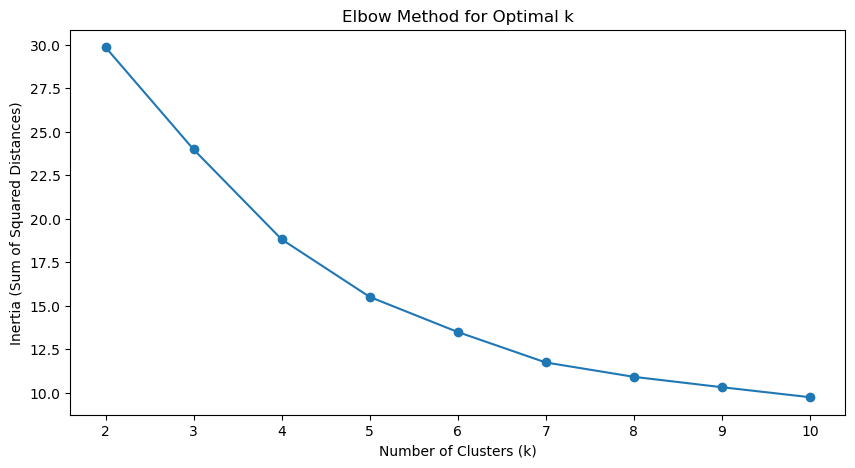

In [243]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

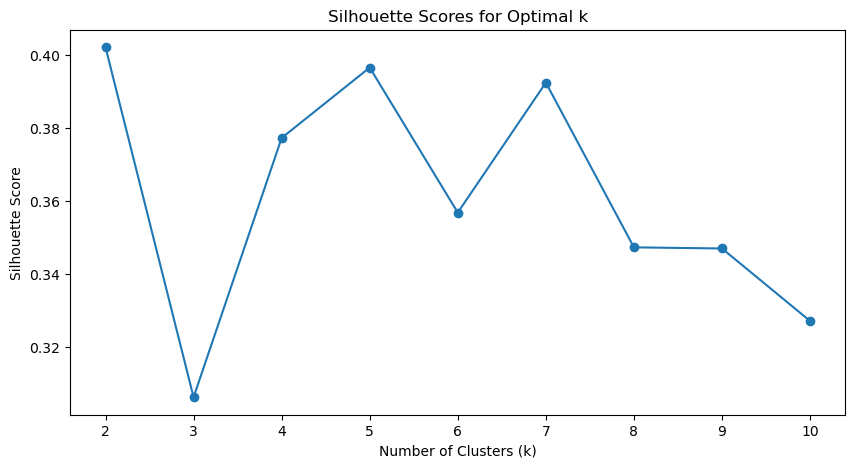

In [244]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [245]:
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k

2

# Lets try with 4 clusters, taking elbow method in mind

In [246]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(iiot_km_train_data)

KMeans(n_clusters=4, random_state=42)

In [247]:
centroids_k4 = kmeans.cluster_centers_

In [248]:
iiot_train_clusters_k4 = kmeans.predict(iiot_km_train_data)
iiot_test_clusters_k4 = kmeans.predict(iiot_km_test_data)

In [249]:
centroids_k4

array([[0.34061912, 0.93456431, 0.96278496, 0.91633296, 0.79490682,
        0.73622143, 0.77950394],
       [0.40165082, 0.93604468, 0.96034901, 0.90397088, 0.78860348,
        0.19402412, 0.44938321],
       [0.39798364, 0.93736282, 0.95652773, 0.90296478, 0.78664583,
        0.19859832, 0.73318134],
       [0.43181242, 0.93511088, 0.96098118, 0.90706968, 0.786167  ,
        0.44514979, 0.58785872]])

In [250]:
pca = PCA(n_components=2)
iiot_train_data_pca = pca.fit_transform(iiot_km_train_data)
iiot_centroids_pca = pca.transform(centroids_k4)

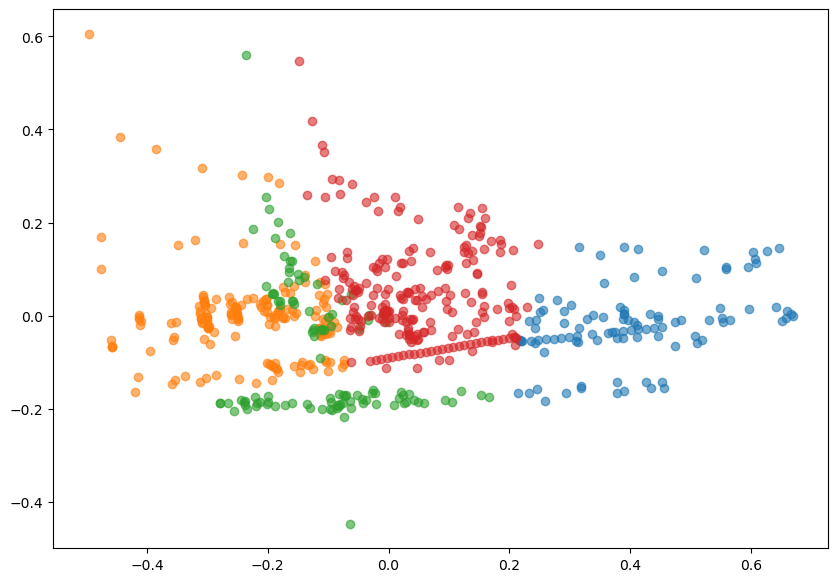

In [251]:
# Plot the training data points with cluster assignments
plt.figure(figsize=(10, 7))
for cluster in range(k):
    iiot_cluster_points = iiot_train_data_pca[iiot_train_clusters_k4 == cluster]
    plt.scatter(iiot_cluster_points[:, 0], iiot_cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)


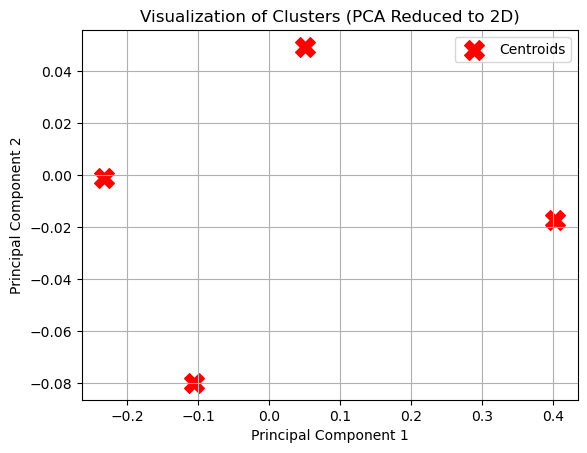

In [252]:
plt.scatter(iiot_centroids_pca[:, 0], iiot_centroids_pca[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title("Visualization of Clusters (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [253]:
# Analyze the distribution of points in each cluster for the training data
iiot_train_cluster_counts = np.bincount(iiot_train_clusters_k4, minlength=k)

# Analyze the distribution of points in each cluster for the test data
iiot_test_cluster_counts = np.bincount(iiot_test_clusters_k4, minlength=k)

# Display the cluster distributions
iiot_train_cluster_counts, iiot_test_cluster_counts

(array([104, 177, 111, 220], dtype=int64),
 array([16, 28, 23, 41], dtype=int64))

# Inject anomalies into the test data

In [254]:
# Create a copy of the test data
iiot_km_test_data_with_anomalies = iiot_km_test_data.copy()

In [255]:
# Inject anomalies by adding large deviations to random rows
num_anomalies = 10  # Number of anomalies to introduce
anomaly_indices = np.random.choice(iiot_km_test_data_with_anomalies.index, size=num_anomalies, replace=False)
iiot_km_test_data_with_anomalies.loc[anomaly_indices] += np.random.uniform(5, 10, size=iiot_km_test_data_with_anomalies.shape[1])

In [256]:
# Calculate distances of all points in test data with anomalies to their assigned cluster centroid
distances_to_centroids = kmeans.transform(iiot_km_test_data_with_anomalies)

# Define an anomaly detection threshold as the 95th percentile of distances in the original test data
threshold = np.percentile(kmeans.transform(iiot_km_test_data).max(axis=1), 95)

# Identify anomalies (points with distances greater than the threshold)
iiot_km_anomalies_detected = np.any(distances_to_centroids > threshold, axis=1)

# Count detected anomalies
iiot_km_detected_anomalies_count = np.sum(iiot_km_anomalies_detected)

# Display results
iiot_km_detected_anomalies_count, num_anomalies

(16, 10)

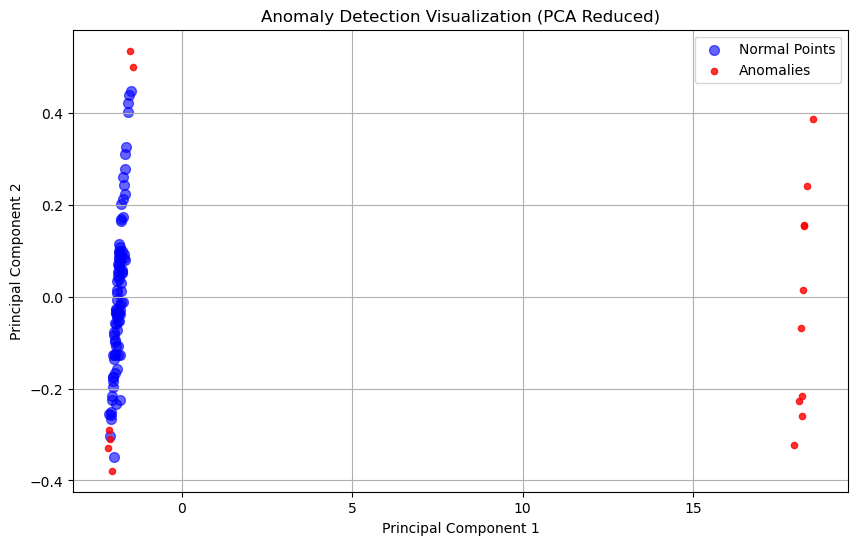

In [275]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(iiot_km_test_data_with_anomalies)

# Extract anomalies and normal points in reduced dimensions
normal_points = reduced_data[~iiot_km_anomalies_detected]
anomaly_points = reduced_data[iiot_km_anomalies_detected]

# Plot the reduced data
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(
    normal_points[:, 0],
    normal_points[:, 1],
    c='blue',
    label='Normal Points',
    alpha=0.6,
    s=50
)

# Plot anomalies
plt.scatter(
    anomaly_points[:, 0],
    anomaly_points[:, 1],
    c='red',
    label='Anomalies',
    alpha=0.8,
    s=20  # Make anomalies slightly larger for visibility
)

# Add labels and title
plt.title('Anomaly Detection Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [257]:
# Assume anomalies are detected using a binary vector (True for anomaly, False for normal)
# We'll create a ground truth array for evaluation (10 true anomalies and rest normal)
num_test_points = len(iiot_km_test_data_with_anomalies)
ground_truth = np.zeros(len(iiot_km_test_data_with_anomalies), dtype=int)
ground_truth[iiot_km_test_data_with_anomalies.index.get_indexer(anomaly_indices)] = 1

# Convert detected anomalies to a binary vector
detected_anomalies_binary = iiot_km_anomalies_detected.astype(int)

# Calculate evaluation metrics
precision = precision_score(ground_truth, detected_anomalies_binary)
recall = recall_score(ground_truth, detected_anomalies_binary)
f1 = f1_score(ground_truth, detected_anomalies_binary)
accuracy = accuracy_score(ground_truth, detected_anomalies_binary)

# Calculate unsupervised metric (Silhouette Score) for test data with anomalies
silhouette = silhouette_score(iiot_km_test_data_with_anomalies, kmeans.predict(iiot_km_test_data_with_anomalies))

# Display all metrics including accuracy
precision, recall, f1, silhouette, accuracy

(0.625, 1.0, 0.7692307692307693, 0.2592245746205937, 0.9444444444444444)

# KMeans Model on Manual Data

In [258]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(manual_km_train_data)

KMeans(n_clusters=4, random_state=42)

In [260]:
centroids_k4 = kmeans.cluster_centers_

In [261]:
manual_km_train_clusters_k4 = kmeans.predict(manual_km_train_data)
manual_km_test_clusters_k4 = kmeans.predict(manual_km_test_data)

In [262]:
centroids_k4

array([[0.255294  , 0.55429088, 0.58812392, 0.56732744, 0.4274491 ,
        0.39675571],
       [0.91212743, 0.55108006, 0.57942533, 0.5497689 , 0.4239838 ,
        0.38845077],
       [0.54350322, 0.56273986, 0.58834237, 0.56978283, 0.44936082,
        0.37471213],
       [0.38428846, 0.60011698, 0.57663044, 0.20433682, 0.12091986,
        0.4681501 ]])

In [263]:
pca = PCA(n_components=2)
manual_train_data_pca = pca.fit_transform(manual_km_train_data)
manual_centroids_pca = pca.transform(centroids_k4)

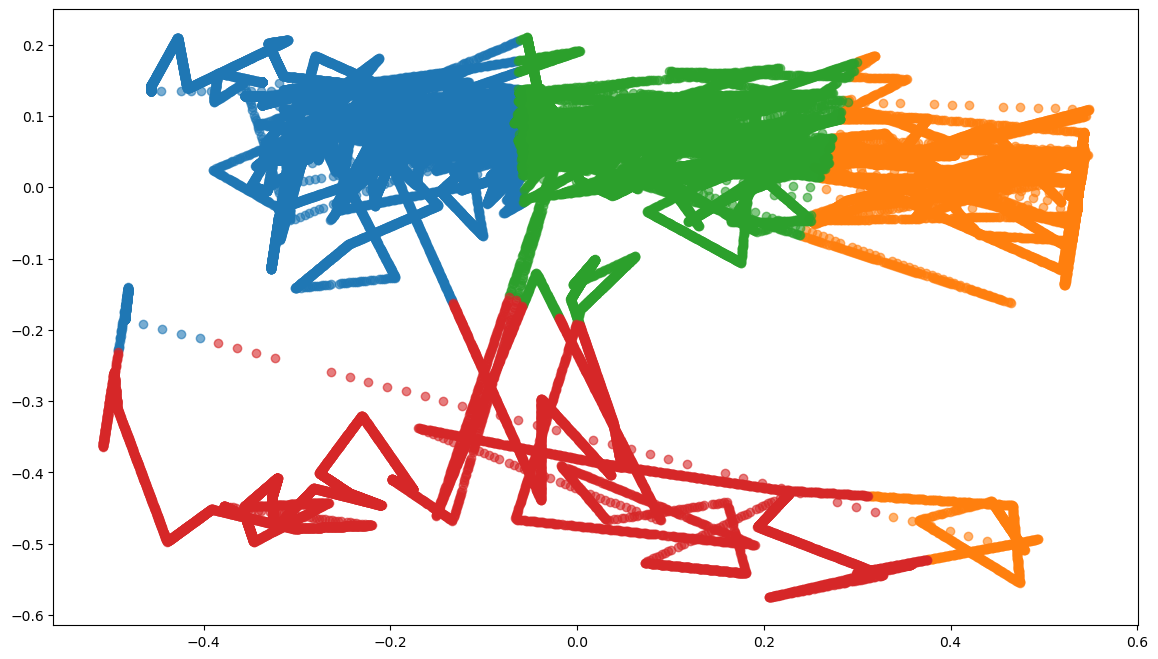

In [264]:
# Plot the training data points with cluster assignments
plt.figure(figsize=(14, 8))
for cluster in range(k):
    manual_cluster_points = manual_train_data_pca[manual_km_train_clusters_k4 == cluster]
    plt.scatter(manual_cluster_points[:, 0], manual_cluster_points[:, 1], label=f"Cluster {cluster}", alpha=0.6)


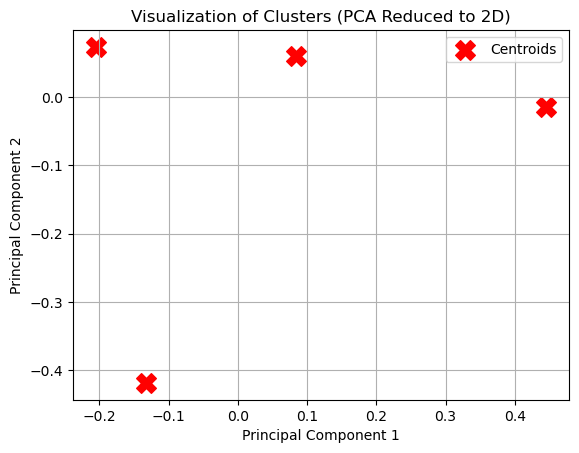

In [265]:
plt.scatter(manual_centroids_pca[:, 0], manual_centroids_pca[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title("Visualization of Clusters (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [266]:
# Analyze the distribution of points in each cluster for the training data
manual_train_cluster_counts = np.bincount(manual_km_train_clusters_k4, minlength=k)

# Analyze the distribution of points in each cluster for the test data
manual_test_cluster_counts = np.bincount(manual_km_test_clusters_k4, minlength=k)

# Display the cluster distributions
manual_train_cluster_counts, manual_test_cluster_counts

(array([38732, 15347, 29437, 10528], dtype=int64),
 array([6727, 2815, 5136, 1919], dtype=int64))

# Inject anomalies into the test data

In [267]:
# Create a copy of the test data
manual_km_test_data_with_anomalies = manual_km_test_data.copy()

In [268]:
# Inject anomalies by adding large deviations to random rows
num_anomalies = 50  # Number of anomalies to introduce
anomaly_indices = np.random.choice(manual_km_test_data_with_anomalies.index, size=num_anomalies, replace=False)
manual_km_test_data_with_anomalies.loc[anomaly_indices] += np.random.uniform(5, 10, size=manual_km_test_data_with_anomalies.shape[1])

In [269]:
# Calculate distances of all points in test data with anomalies to their assigned cluster centroid
distances_to_centroids = kmeans.transform(manual_km_test_data_with_anomalies)

# Define an anomaly detection threshold as the 95th percentile of distances in the original test data
threshold = np.percentile(kmeans.transform(manual_km_test_data).max(axis=1), 95)

# Identify anomalies (points with distances greater than the threshold)
manual_km_anomalies_detected = np.any(distances_to_centroids > threshold, axis=1)

# Step 4: Count detected anomalies
manual_km_detected_anomalies_count = np.sum(manual_km_anomalies_detected)

# Display results
manual_km_detected_anomalies_count, num_anomalies

(877, 50)

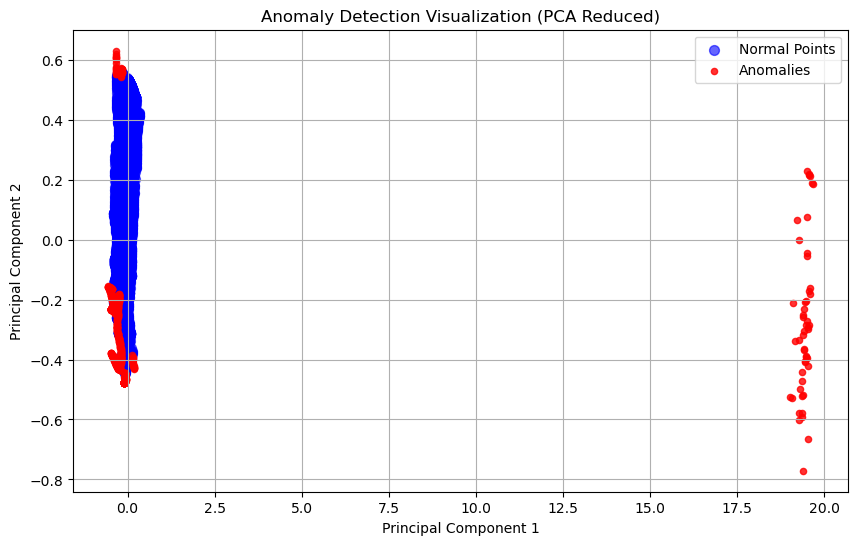

In [276]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(manual_km_test_data_with_anomalies)

# Extract anomalies and normal points in reduced dimensions
normal_points = reduced_data[~manual_km_anomalies_detected]
anomaly_points = reduced_data[manual_km_anomalies_detected]

# Plot the reduced data
plt.figure(figsize=(10, 6))

# Plot normal points
plt.scatter(
    normal_points[:, 0],
    normal_points[:, 1],
    c='blue',
    label='Normal Points',
    alpha=0.6,
    s=50
)

# Plot anomalies
plt.scatter(
    anomaly_points[:, 0],
    anomaly_points[:, 1],
    c='red',
    label='Anomalies',
    alpha=0.8,
    s=20  # Make anomalies slightly larger for visibility
)

# Add labels and title
plt.title('Anomaly Detection Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [270]:
# Assume anomalies are detected using a binary vector (True for anomaly, False for normal)
# We'll create a ground truth array for evaluation (10 true anomalies and rest normal)
num_test_points = len(manual_km_test_data_with_anomalies)
ground_truth = np.zeros(len(manual_km_test_data_with_anomalies), dtype=int)
ground_truth[manual_km_test_data_with_anomalies.index.get_indexer(anomaly_indices)] = 1

# Convert detected anomalies to a binary vector
detected_anomalies_binary = manual_km_anomalies_detected.astype(int)

# Calculate evaluation metrics
precision = precision_score(ground_truth, detected_anomalies_binary)
recall = recall_score(ground_truth, detected_anomalies_binary)
f1 = f1_score(ground_truth, detected_anomalies_binary)
accuracy = accuracy_score(ground_truth, detected_anomalies_binary)

# Calculate unsupervised metric (Silhouette Score) for test data with anomalies
silhouette = silhouette_score(manual_km_test_data_with_anomalies, kmeans.predict(manual_km_test_data_with_anomalies))

# Display all metrics including accuracy
precision, recall, f1, silhouette, accuracy

(0.05701254275940707,
 1.0,
 0.10787486515641856,
 0.2671818626322644,
 0.9501717177803217)

# Isolation Forrest Algorithm Training

In [157]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [158]:
iiot_if_data = iiot_data.drop(columns=['TIME', 'EPOCH'])

In [159]:
manual_if_data = manual_data.drop(columns=['TIME', 'EPOCH'])

In [160]:
# Initialize scaler
scaler = StandardScaler()

# Scale the IIoT and Manual datasets
iiot_if_scaled = scaler.fit_transform(iiot_if_data)  # Apply scaling to the entire dataset
manual_if_scaled = scaler.fit_transform(manual_if_data)

In [161]:
iiot_if_train_data, iiot_if_test_data = train_test_split(iiot_if_scaled, test_size=0.15, random_state=42)

In [162]:
manual_if_train_data, manual_if_test_data = train_test_split(manual_if_scaled, test_size=0.15, random_state=42)

# IIOT Data Model Training

In [163]:
# Train the Isolation Forest model on IIoT training data
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(iiot_if_train_data)

IsolationForest(contamination=0.05, random_state=42)

In [164]:
# Predict anomalies on the IIoT test dataset
iiot_if_test_predictions = iso_forest.predict(iiot_if_test_data)
iiot_if_anomalies = iiot_if_test_predictions == -1  # Anomalies are marked as -1

In [165]:
# Count anomalies
print(f"Number of anomalies in IIoT test dataset: {np.sum(iiot_if_anomalies)}")

Number of anomalies in IIoT test dataset: 3


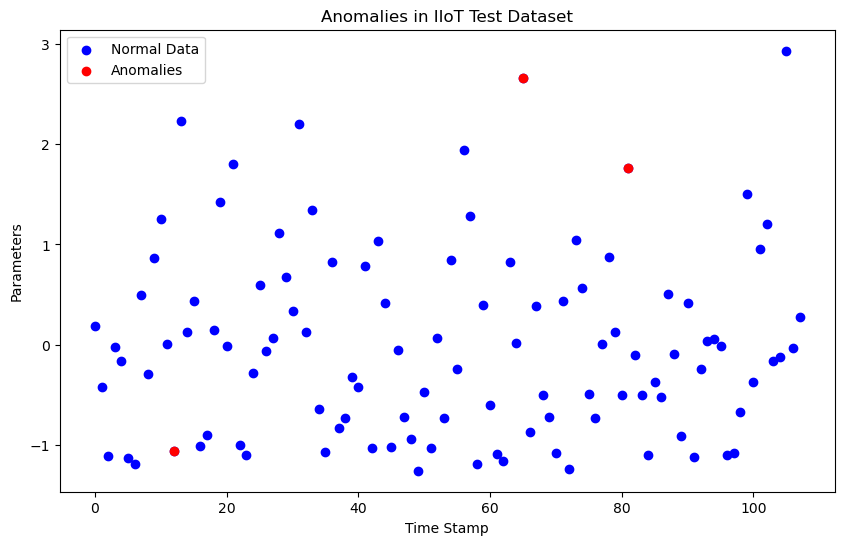

In [166]:
# Visualize anomalies in IIoT test dataset
plt.figure(figsize=(10, 6))
plt.scatter(range(len(iiot_if_test_data)), iiot_if_test_data[:, 0], c='blue', label='Normal Data')
plt.scatter(np.where(iiot_if_anomalies)[0], iiot_if_test_data[iiot_if_anomalies, 0], c='red', label='Anomalies')
plt.title('Anomalies in IIoT Test Dataset')
plt.xlabel('Time Stamp')
plt.ylabel('Parameters')
plt.legend()
plt.show()


# Inject Anomalies in Test Data for Evaluation

In [167]:
# Create a copy of the test data
iiot_if_test_data_with_anomalies = iiot_if_test_data.copy()

# Inject anomalies by adding large deviations to random samples
num_anomalies = 10  # Number of anomalies to introduce
anomaly_indices = np.random.choice(iiot_if_test_data_with_anomalies.shape[0], size=num_anomalies, replace=False)
iiot_if_test_data_with_anomalies[anomaly_indices] += np.random.uniform(5, 10, size=iiot_if_test_data_with_anomalies.shape[1])


In [168]:
# Calculate distances to identify anomalies
iiot_test_predictions = iso_forest.predict(iiot_if_test_data_with_anomalies)
iiot_anomalies_detected = iiot_test_predictions == -1  # Anomalies are marked as -1

In [173]:
# Calculate the number of detected anomalies
iiot_if_detected_anomalies_count = np.sum(iiot_anomalies_detected)

# Displaying the Results
print(f"Detected Anomalies: {iiot_if_detected_anomalies_count}")
print(f"Injected Anomalies: {num_anomalies}")

Detected Anomalies: 13
Injected Anomalies: 10


In [176]:
# Create ground truth for evaluation
ground_truth = np.zeros(len(iiot_if_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Convert detected anomalies to binary vector
detected_anomalies_binary = iiot_anomalies_detected.astype(int)

# Calculate evaluation metrics
precision = precision_score(ground_truth, detected_anomalies_binary)
recall = recall_score(ground_truth, detected_anomalies_binary)
f1 = f1_score(ground_truth, detected_anomalies_binary)
accuracy = accuracy_score(ground_truth, detected_anomalies_binary)

# Display metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.7692307692307693
Recall: 1.0
F1 Score: 0.8695652173913043
Accuracy: 0.9722222222222222


# Manual Data Model Training

In [178]:
# Train the Isolation Forest model on Manual training data
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(manual_if_train_data)

IsolationForest(contamination=0.05, random_state=42)

In [179]:
# Predict anomalies on the Manual test dataset
manual_if_test_predictions = iso_forest.predict(manual_if_test_data)
manual_if_anomalies = manual_if_test_predictions == -1  # Anomalies are marked as -1

In [180]:
# Count anomalies
print(f"Number of anomalies in Manual test dataset: {np.sum(manual_if_anomalies)}")

Number of anomalies in Manual test dataset: 857


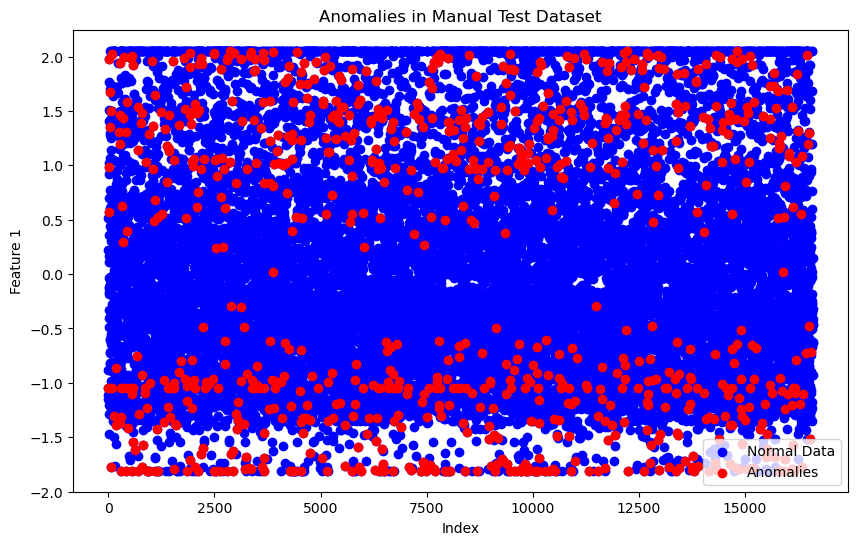

In [181]:
# Visualize anomalies in Manual test dataset
plt.figure(figsize=(10, 6))

# Normal data points
plt.scatter(range(len(manual_if_test_data)), manual_if_test_data[:, 0], c='blue', label='Normal Data')

# Anomalous data points
plt.scatter(np.where(manual_if_anomalies)[0], manual_if_test_data[manual_if_anomalies, 0], c='red', label='Anomalies')

plt.title('Anomalies in Manual Test Dataset')
plt.xlabel('Index')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

# Inject Anomalies in Test Data for Evaluation

In [182]:
# Create a copy of the test data
manual_if_test_data_with_anomalies = manual_if_test_data.copy()

# Inject anomalies by adding large deviations to random samples
num_anomalies = 50  # Number of anomalies to introduce
anomaly_indices = np.random.choice(manual_if_test_data_with_anomalies.shape[0], size=num_anomalies, replace=False)
manual_if_test_data_with_anomalies[anomaly_indices] += np.random.uniform(5, 10, size=manual_if_test_data_with_anomalies.shape[1])


In [183]:
# Calculate distances to identify anomalies
manual_test_predictions = iso_forest.predict(manual_if_test_data_with_anomalies)
manual_anomalies_detected = manual_test_predictions == -1  # Anomalies are marked as -1

In [184]:
# Count the number of detected anomalies
manual_if_detected_anomalies_count = np.sum(manual_anomalies_detected)  # Detected anomalies

# Display the results
print(f"Detected anomalies: {manual_if_detected_anomalies_count}")
print(f"Injected anomalies: {num_anomalies}")

Detected anomalies: 903
Injected anomalies: 50


In [185]:
# Create ground truth for evaluation
ground_truth = np.zeros(len(manual_if_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Convert detected anomalies to binary vector
detected_anomalies_binary = manual_anomalies_detected.astype(int)

# Calculate evaluation metrics
precision = precision_score(ground_truth, detected_anomalies_binary)
recall = recall_score(ground_truth, detected_anomalies_binary)
f1 = f1_score(ground_truth, detected_anomalies_binary)
accuracy = accuracy_score(ground_truth, detected_anomalies_binary)

# Display metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.05537098560354374
Recall: 1.0
F1 Score: 0.1049317943336831
Accuracy: 0.9486051696089655


# Autoencoders Model Training

In [132]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [133]:
iiot_ae_data = iiot_data.drop(columns=['TIME', 'EPOCH'])
iiot_ae_train_data, iiot_ae_test_data = train_test_split(iiot_ae_data, test_size=0.15, random_state=42)

In [134]:
manual_ae_data = manual_data.drop(columns=['TIME', 'EPOCH'])
manual_ae_train_data, manual_ae_test_data = train_test_split(manual_ae_data, test_size=0.15, random_state=42)

# IIOT Data Model Training

In [135]:
# Define the Autoencoder
input_dim = iiot_ae_train_data.shape[1]  # Number of features
encoding_dim = 4 # Compression to 4 dimensions

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(encoding_dim, activation="relu")(input_layer)

# Decoder
decoder = Dense(input_dim, activation="sigmoid")(encoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [136]:
# Train the Autoencoder
history = autoencoder.fit(
    iiot_ae_train_data,
    iiot_ae_train_data,  # Output is the same as input
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1140 - val_loss: 0.1029
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1017 - val_loss: 0.0926
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0916 - val_loss: 0.0837
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0822 - val_loss: 0.0761
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0760 - val_loss: 0.0695
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0690 - val_loss: 0.0636
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0619 - val_loss: 0.0582
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0572 - val_loss: 0.0532
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0528 - val_loss: 0.0487
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0481 - val_loss: 0.0446
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0440 - val_loss: 0.0410
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

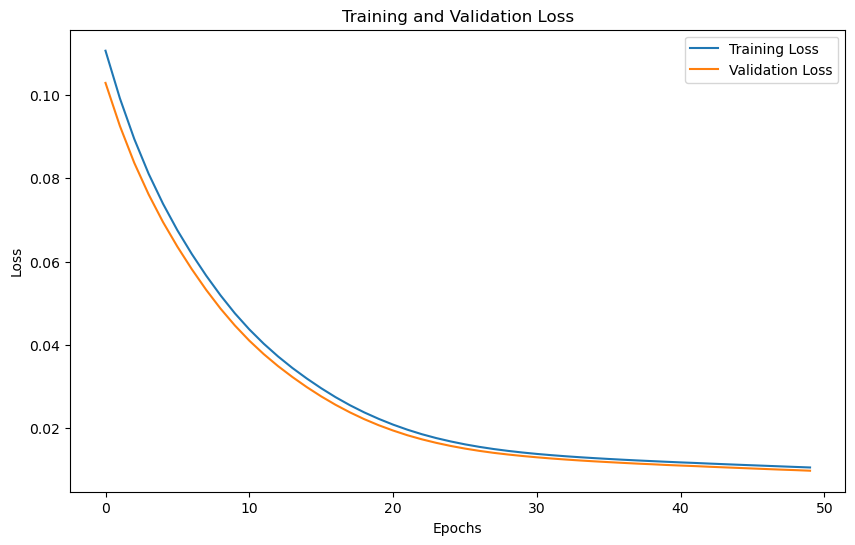

In [137]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [138]:
# Reconstruct test data
reconstructed_data = autoencoder.predict(iiot_ae_test_data)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(iiot_ae_test_data - reconstructed_data), axis=1)

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

print(f"Number of anomalies detected: {np.sum(anomalies)}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Number of anomalies detected: 6


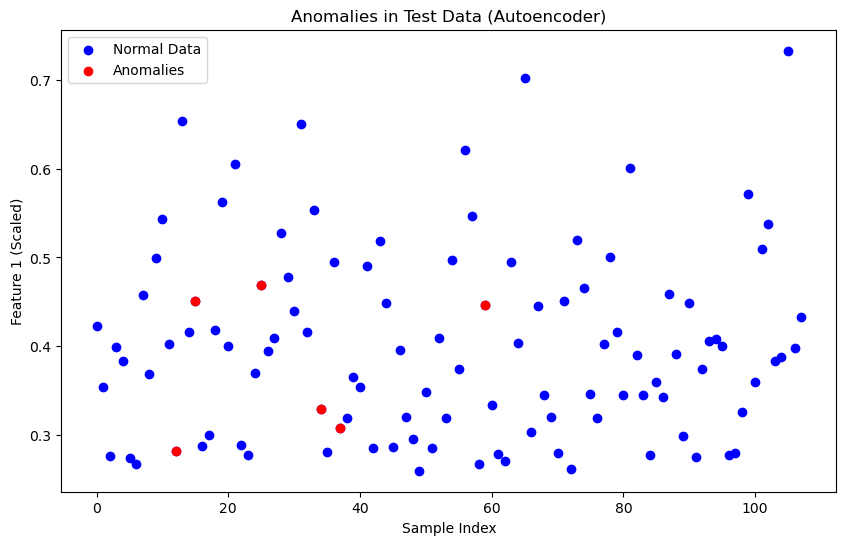

In [139]:
plt.figure(figsize=(10, 6))

# Normal data points
plt.scatter(
    range(len(iiot_ae_test_data)),
    iiot_ae_test_data.iloc[:, 0],  # Use .iloc for the first feature
    c='blue',
    label='Normal Data'
)

# Anomalous data points
plt.scatter(
    np.where(anomalies)[0],
    iiot_ae_test_data.loc[anomalies, iiot_ae_test_data.columns[0]],  # Use .loc for boolean indexing
    c='red',
    label='Anomalies'
)

plt.title('Anomalies in Test Data (Autoencoder)')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1 (Scaled)')
plt.legend()
plt.show()

# Inject Anomalies into Test Data

In [140]:
# Create a copy of the test data
iiot_test_data_with_anomalies = iiot_ae_test_data.copy()

# Ensure positional indices are used for random selection
num_anomalies = 10  # Number of anomalies to introduce
anomaly_indices = np.random.choice(range(len(iiot_test_data_with_anomalies)), size=num_anomalies, replace=False)

# Inject anomalies by adding large deviations to random samples
iiot_test_data_with_anomalies.iloc[anomaly_indices] += np.random.uniform(5, 10, size=iiot_test_data_with_anomalies.shape[1])

In [141]:
# Reconstruct data using the Autoencoder
reconstructed_data = autoencoder.predict(iiot_test_data_with_anomalies)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(iiot_test_data_with_anomalies - reconstructed_data), axis=1)

# Define a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)
detected_anomalies = reconstruction_error > threshold  # Boolean mask for detected anomalies

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [144]:
# Calculate log-likelihood as negative reconstruction error
log_likelihood = -reconstruction_error

# Display log-likelihood statistics
print(f"Log-Likelihood (mean): {log_likelihood.mean():.2f}")
print(f"Log-Likelihood (min): {log_likelihood.min():.2f}")
print(f"Log-Likelihood (max): {log_likelihood.max():.2f}")

Log-Likelihood (mean): -4.71
Log-Likelihood (min): -51.57
Log-Likelihood (max): -0.00


In [143]:
# Create ground truth labels (1 for injected anomalies, 0 for normal)
ground_truth = np.zeros(len(iiot_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Convert detected anomalies to binary labels (1 for anomalies, 0 for normal)
detected_anomalies_binary = detected_anomalies.astype(int)

# Calculate evaluation metrics
precision = precision_score(ground_truth, detected_anomalies_binary)
recall = recall_score(ground_truth, detected_anomalies_binary)
f1 = f1_score(ground_truth, detected_anomalies_binary)
accuracy = accuracy_score(ground_truth, detected_anomalies_binary)


# Display metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 1.0
Recall: 0.6
F1 Score: 0.75
Accuracy: 0.9629629629629629


# Manual Data Model Training

In [145]:
# Define the Autoencoder
input_dim = manual_ae_train_data.shape[1]  # Number of features
encoding_dim = 4 # Compression to 4 dimensions

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(encoding_dim, activation="relu")(input_layer)

# Decoder
decoder = Dense(input_dim, activation="sigmoid")(encoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58 (232.00 B)

 Trainable params: 58 (232.00 B)

 Non-trainable params: 0 (0.00 B)

In [146]:
# Train the Autoencoder
history = autoencoder.fit(
    manual_ae_train_data,
    manual_ae_train_data,  # Output is the same as input
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0133 - val_loss: 0.0031
Epoch 2/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 3/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 4/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 9.6294e-04 - val_loss: 8.1931e-04
Epoch 5/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 8.1742e-04 - val_loss: 7.5174e-04
Epoch 6/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.5673e-04 - val_loss: 7.3007e-04
Epoch 7/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.3950e-04 - val_loss: 7.2037e-04
Epoch 8/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.3043e-04 - val_loss: 7.1650e-04
Epoch 9/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.1814e-04 - val_loss: 7.2303e-04
Epoch 10/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 7.1993e-04 - val_loss: 7.1709e-04
Epoch 11/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss:

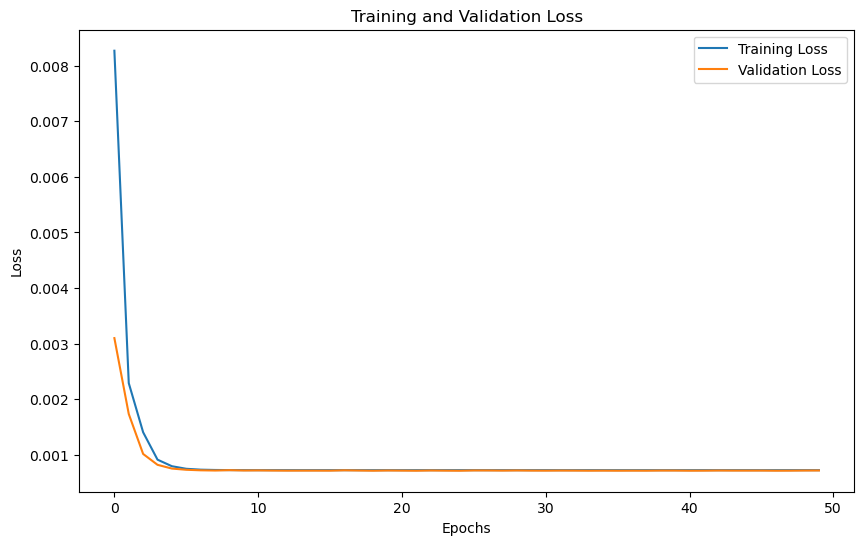

In [147]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [148]:
# Reconstruct test data
reconstructed_data = autoencoder.predict(manual_ae_test_data)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(manual_ae_test_data - reconstructed_data), axis=1)

# Set a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

print(f"Number of anomalies detected: {np.sum(anomalies)}")

519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of anomalies detected: 830


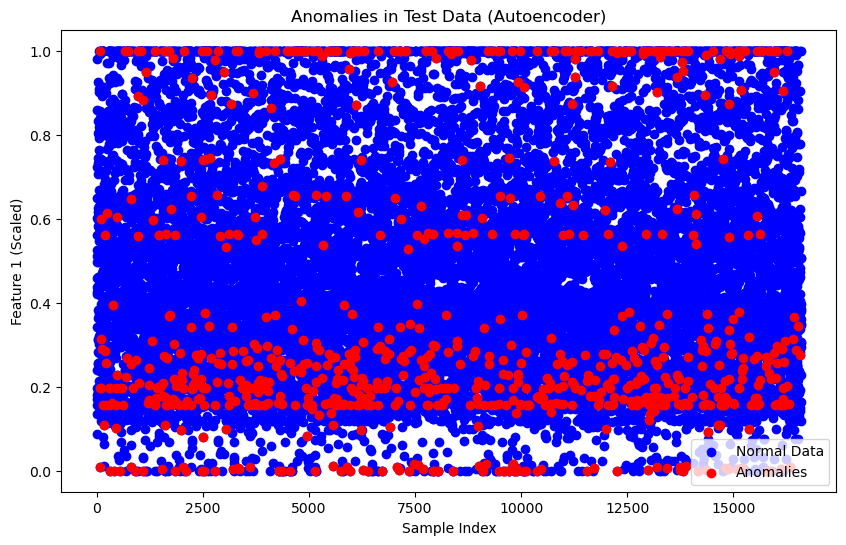

In [149]:
plt.figure(figsize=(10, 6))

# Normal data points
plt.scatter(
    range(len(manual_ae_test_data)),
    manual_ae_test_data.iloc[:, 0],  # Use .iloc for the first feature
    c='blue',
    label='Normal Data'
)

# Anomalous data points
plt.scatter(
    np.where(anomalies)[0],
    manual_ae_test_data.loc[anomalies, manual_ae_test_data.columns[0]],  # Use .loc for boolean indexing
    c='red',
    label='Anomalies'
)

plt.title('Anomalies in Test Data (Autoencoder)')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1 (Scaled)')
plt.legend()
plt.show()

# Inject Anolmalies in Manual Test Data 

In [150]:
# Create a copy of the test data
manual_test_data_with_anomalies = manual_ae_test_data.copy()

# Ensure positional indices are used for random selection
num_anomalies = 50  # Number of anomalies to introduce
anomaly_indices = np.random.choice(range(len(manual_test_data_with_anomalies)), size=num_anomalies, replace=False)

# Inject anomalies by adding large deviations to random samples
manual_test_data_with_anomalies.iloc[anomaly_indices] += np.random.uniform(5, 10, size=manual_test_data_with_anomalies.shape[1])

In [151]:
# Reconstruct data using the Autoencoder
reconstructed_data = autoencoder.predict(manual_test_data_with_anomalies)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(manual_test_data_with_anomalies - reconstructed_data), axis=1)

# Define a threshold for anomalies (e.g., 95th percentile)
threshold = np.percentile(reconstruction_error, 95)
detected_anomalies = reconstruction_error > threshold  # Boolean mask for detected anomalies

519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [152]:
# Calculate log-likelihood as negative reconstruction error
log_likelihood = -reconstruction_error

# Display log-likelihood statistics
print(f"Log-Likelihood (mean): {log_likelihood.mean():.2f}")
print(f"Log-Likelihood (min): {log_likelihood.min():.2f}")
print(f"Log-Likelihood (max): {log_likelihood.max():.2f}")

Log-Likelihood (mean): -0.18
Log-Likelihood (min): -62.02
Log-Likelihood (max): -0.00


In [153]:
# Convert reconstruction errors into a single feature for clustering
error_data = reconstruction_error.values.reshape(-1, 1)

# Calculate silhouette score based on detected anomalies
silhouette = silhouette_score(error_data, detected_anomalies.astype(int))# Create ground truth labels (1 for injected anomalies, 0 for normal)
ground_truth = np.zeros(len(manual_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Convert detected anomalies to binary labels (1 for anomalies, 0 for normal)
detected_anomalies_binary = detected_anomalies.astype(int)

# Calculate evaluation metrics
precision = precision_score(ground_truth, detected_anomalies_binary)
recall = recall_score(ground_truth, detected_anomalies_binary)
f1 = f1_score(ground_truth, detected_anomalies_binary)
accuracy = accuracy_score(ground_truth, detected_anomalies_binary)

# Display metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.060240963855421686
Recall: 1.0
F1 Score: 0.11363636363636363
Accuracy: 0.9530035548593119


# DBSCAN Model Training

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Preprocess the data
scaler = StandardScaler()
iiot_scaled_data = scaler.fit_transform(iiot_cleaned_data)  # Replace `iiot_data` with your loaded IIoT dataset
manual_scaled_data = scaler.fit_transform(manual_cleaned_data)  # Replace `manual_data` with your manual dataset

# Split the data into training and testing sets
iiot_train_data, iiot_test_data = train_test_split(iiot_scaled_data, test_size=0.15, random_state=42)
manual_train_data, manual_test_data = train_test_split(manual_scaled_data, test_size=0.15, random_state=42)

# IIOT Data Model Training

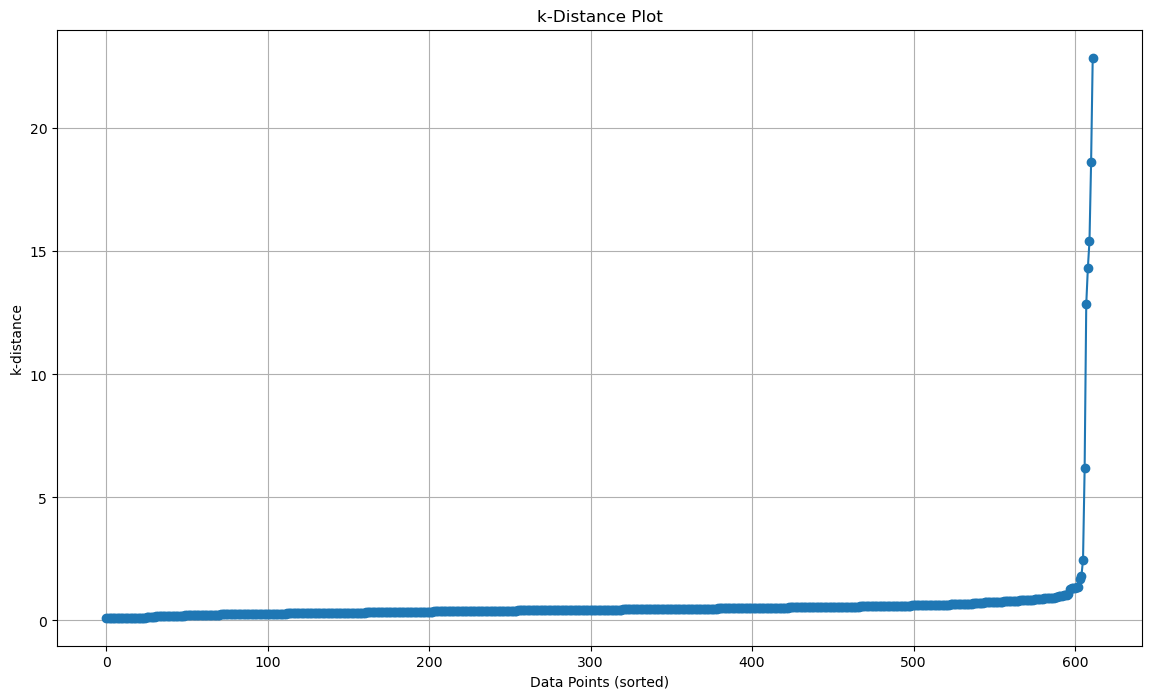

In [101]:
# Define the k-distance plotting function
def plot_k_distance(data, k):
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    nearest_neighbors.fit(data)
    distances, indices = nearest_neighbors.kneighbors(data)
    sorted_distances = sorted(distances[:, k-1])  # Sort distances to the k-th nearest neighbor

    # Plot the k-distance graph
    plt.figure(figsize=(14, 8))
    plt.plot(sorted_distances, marker='o')  # Add markers to make the elbow clearer
    plt.title("k-Distance Plot")
    plt.xlabel("Data Points (sorted)")
    plt.ylabel("k-distance")
    plt.grid(True)  # Add a grid for better visualization
    plt.show()


# Example usage
k = 5  # Set the value of k (should match min_samples in DBSCAN)
plot_k_distance(iiot_train_data, k)

In [104]:
optimal_eps = 2.0  # Adjust based on the elbow point from k-distance plot
min_samples = 4  # Minimum points per cluster (can adjust based on dataset)

dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan.fit(iiot_train_data)
train_labels = dbscan.labels_

# Check cluster distribution
unique_labels, counts = np.unique(train_labels, return_counts=True)
print("Cluster Distribution (including -1 for noise):")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

Cluster Distribution (including -1 for noise):
Cluster -1: 7 points
Cluster 0: 591 points
Cluster 1: 14 points


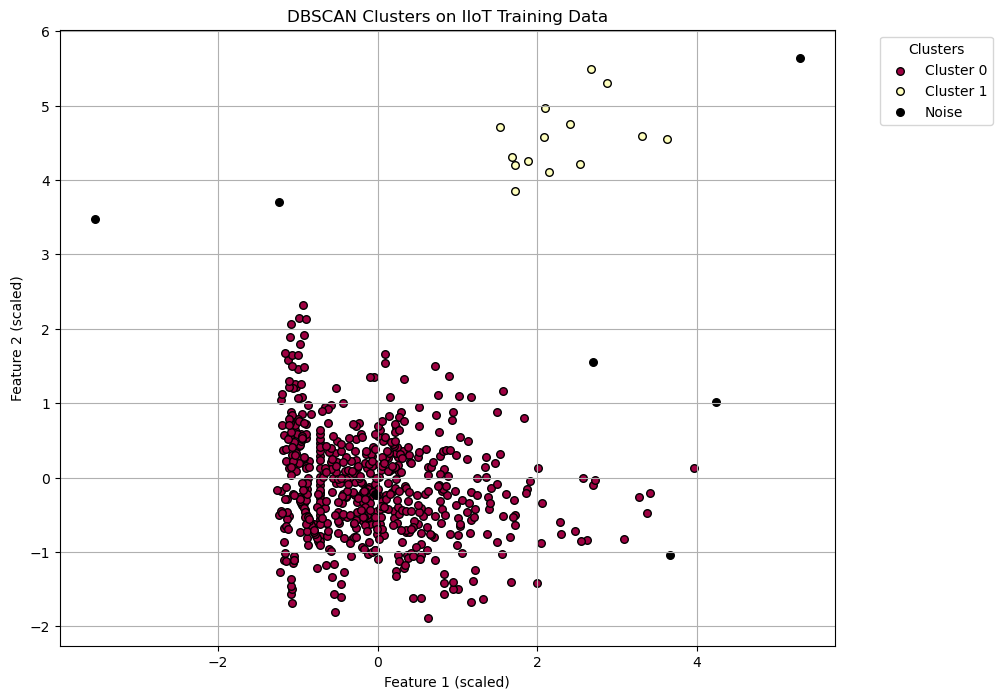

In [105]:
# Plot the clusters
def plot_clusters(data, labels, title="DBSCAN Clusters"):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    plt.figure(figsize=(10, 8))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = (labels == k)
        
        xy = data[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f"Cluster {k}" if k != -1 else "Noise", s=30, edgecolor='k')
    
    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.legend(loc="best", bbox_to_anchor=(1.05, 1), title="Clusters")
    plt.grid(True)
    plt.show()

# Call the function to plot clusters for training data
plot_clusters(iiot_train_data, train_labels, title="DBSCAN Clusters on IIoT Training Data")

In [106]:
# Inject anomalies into the test data
iiot_test_data_with_anomalies = pd.DataFrame(iiot_test_data).copy()
num_anomalies = 10  # Number of anomalies to introduce
anomaly_indices = np.random.choice(iiot_test_data_with_anomalies.index, size=num_anomalies, replace=False)
iiot_test_data_with_anomalies.iloc[anomaly_indices] += np.random.uniform(5, 10, size=iiot_test_data_with_anomalies.shape[1])

# Predict anomalies on the test data
test_labels = dbscan.fit_predict(iiot_test_data_with_anomalies)  # Fit DBSCAN on the test data
detected_anomalies = test_labels == -1  # Anomalies are labeled as -1

# Create ground truth for evaluation
ground_truth = np.zeros(len(iiot_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Evaluate the DBSCAN model
precision = precision_score(ground_truth, detected_anomalies)
recall = recall_score(ground_truth, detected_anomalies)
f1 = f1_score(ground_truth, detected_anomalies)
accuracy = accuracy_score(ground_truth, detected_anomalies)

# Calculate silhouette score (if meaningful clusters exist)
if len(set(test_labels)) > 1 and -1 in test_labels:  # Ensure clusters and anomalies exist
    silhouette = silhouette_score(iiot_test_data_with_anomalies, test_labels)
    print(f"Silhouette Score: {silhouette:.2f}")
else:
    silhouette = "Not Applicable (Only one cluster)"
    print("Silhouette Score:", silhouette)

# Display evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Silhouette Score: 0.79
Precision: 1.00
Recall: 0.20
F1 Score: 0.33
Accuracy: 0.93


# Manual Data Model Traninig

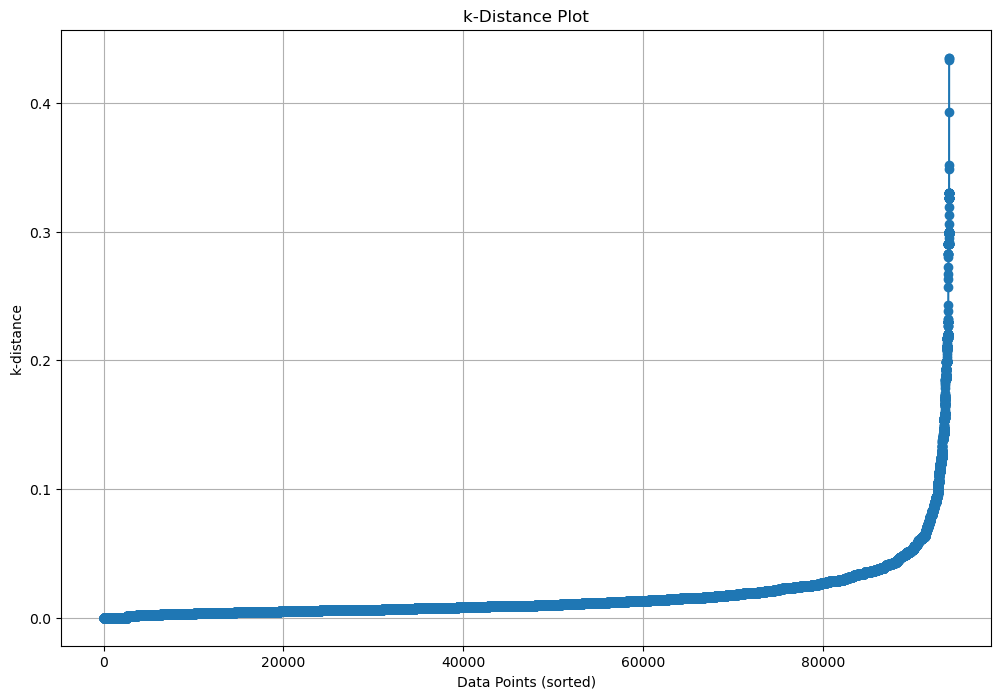

In [125]:
# Define the k-distance plotting function
def plot_k_distance(data, k):
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    nearest_neighbors.fit(data)
    distances, indices = nearest_neighbors.kneighbors(data)
    sorted_distances = sorted(distances[:, k-1])  # Sort distances to the k-th nearest neighbor

    # Plot the k-distance graph
    plt.figure(figsize=(12, 8))
    plt.plot(sorted_distances, marker='o')  # Add markers to make the elbow clearer
    plt.title("k-Distance Plot")
    plt.xlabel("Data Points (sorted)")
    plt.ylabel("k-distance")
    plt.grid(True)  # Add a grid for better visualization
    plt.show()


# Example usage
k = 5  # Set the value of k (should match min_samples in DBSCAN)
plot_k_distance(manual_train_data, k)

In [108]:
optimal_eps = 0.1  # Adjust based on the elbow point from k-distance plot
min_samples = 4  # Minimum points per cluster (can adjust based on dataset)

dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan.fit(manual_train_data)
train_labels = dbscan.labels_

In [109]:
# Check cluster distribution
unique_labels, counts = np.unique(train_labels, return_counts=True)
print("Cluster Distribution (including -1 for noise):")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} points")

Cluster Distribution (including -1 for noise):
Cluster -1: 791 points
Cluster 0: 7852 points
Cluster 1: 3952 points
Cluster 2: 12524 points
Cluster 3: 1586 points
Cluster 4: 16831 points
Cluster 5: 1520 points
Cluster 6: 3219 points
Cluster 7: 2709 points
Cluster 8: 11827 points
Cluster 9: 4048 points
Cluster 10: 2933 points
Cluster 11: 4571 points
Cluster 12: 1222 points
Cluster 13: 531 points
Cluster 14: 2240 points
Cluster 15: 575 points
Cluster 16: 795 points
Cluster 17: 1760 points
Cluster 18: 1718 points
Cluster 19: 32 points
Cluster 20: 308 points
Cluster 21: 1425 points
Cluster 22: 1436 points
Cluster 23: 931 points
Cluster 24: 2140 points
Cluster 25: 200 points
Cluster 26: 342 points
Cluster 27: 2130 points
Cluster 28: 119 points
Cluster 29: 54 points
Cluster 30: 826 points
Cluster 31: 49 points
Cluster 32: 13 points
Cluster 33: 225 points
Cluster 34: 71 points
Cluster 35: 20 points
Cluster 36: 274 points
Cluster 37: 10 points
Cluster 38: 15 points
Cluster 39: 39 points
Cluste

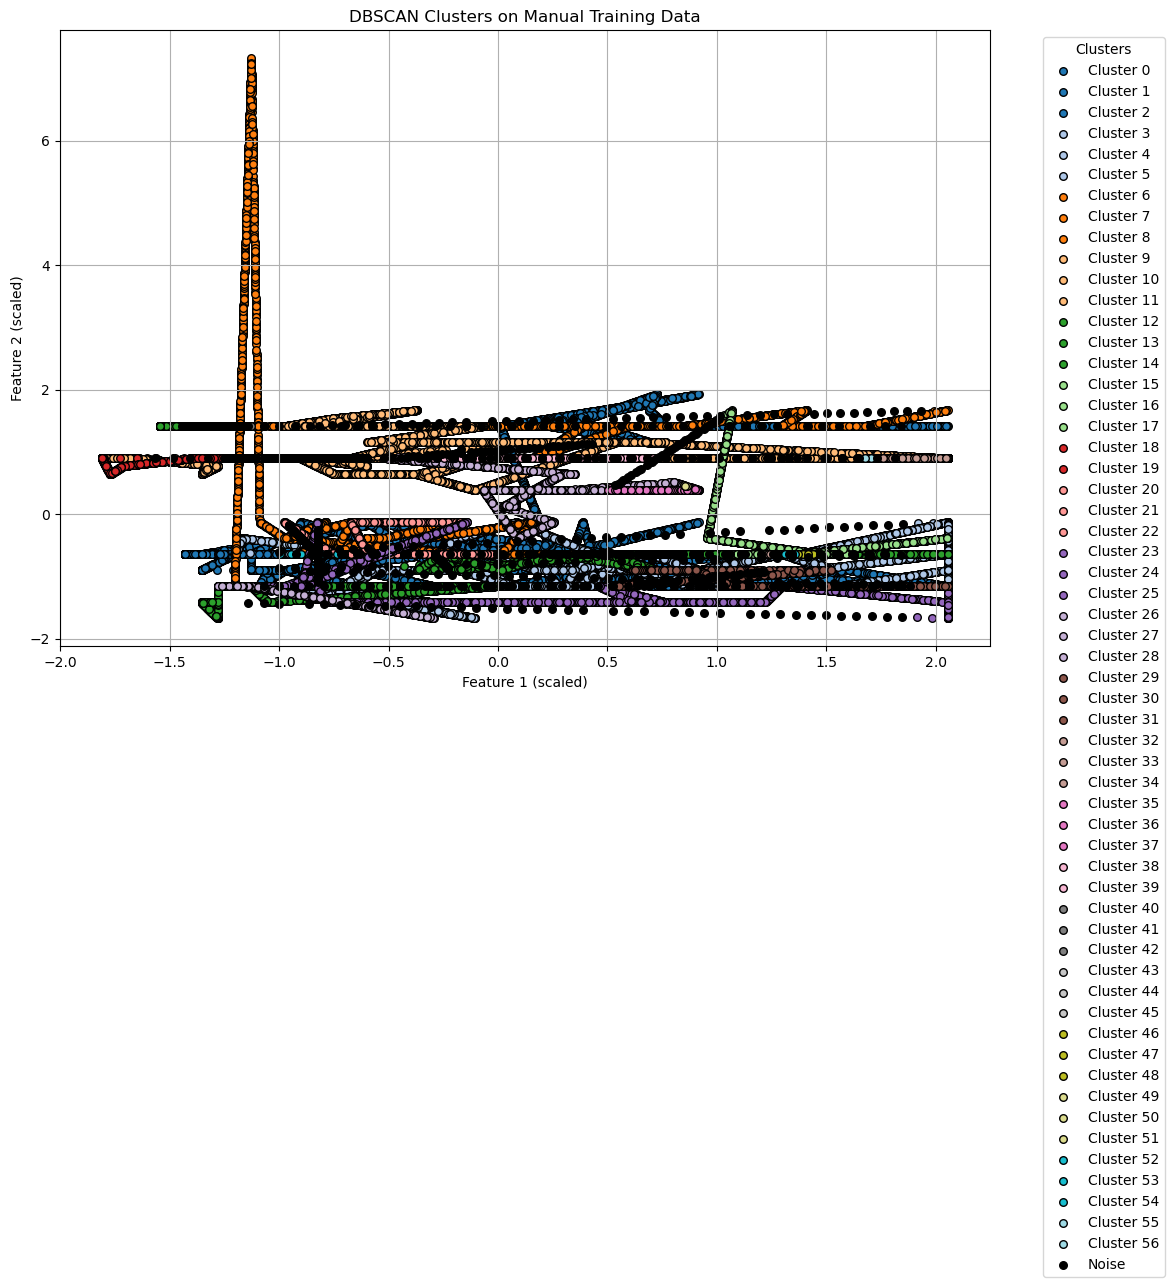

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the clusters
def plot_clusters(data, labels, title="DBSCAN Clusters"):
    unique_labels = set(labels)
    colors = [plt.cm.tab20(each) for each in np.linspace(0, 1, len(unique_labels))]  # Use tab20 colormap

    plt.figure(figsize=(12, 8))

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black color for noise points
            col = [0, 0, 0, 1]  # RGBA for black

        class_member_mask = (labels == k)
        xy = data[class_member_mask]

        plt.scatter(
            xy[:, 0], xy[:, 1], c=[col], s=30, label=f"Cluster {k}" if k != -1 else "Noise", edgecolor="k"
        )

    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")
    plt.legend(loc="best", bbox_to_anchor=(1.05, 1), title="Clusters")
    plt.grid(True)
    plt.show()

# Call the function to plot clusters for training data
plot_clusters(manual_train_data, train_labels, title="DBSCAN Clusters on Manual Training Data")

In [111]:
# Inject anomalies into the test data
manual_test_data_with_anomalies = pd.DataFrame(manual_test_data).copy()  # Replace with your test dataset
num_anomalies = 500 # Number of anomalies to introduce
anomaly_indices = np.random.choice(
    manual_test_data_with_anomalies.index, size=num_anomalies, replace=False
)
manual_test_data_with_anomalies.iloc[anomaly_indices] += np.random.uniform(
    5, 10, size=manual_test_data_with_anomalies.shape[1]
)

# Step 6: Predict anomalies on the test data
test_labels = dbscan.fit_predict(manual_test_data_with_anomalies)
detected_anomalies = test_labels == -1  # Anomalies are labeled as -1

# Step 7: Create ground truth for evaluation
ground_truth = np.zeros(len(manual_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Step 8: Evaluate the DBSCAN model
precision = precision_score(ground_truth, detected_anomalies)
recall = recall_score(ground_truth, detected_anomalies)
f1 = f1_score(ground_truth, detected_anomalies)
accuracy = accuracy_score(ground_truth, detected_anomalies)

# Step 9: Calculate silhouette score (if meaningful clusters exist)
if len(set(test_labels)) > 1 and -1 in test_labels:  # Ensure clusters and anomalies exist
    silhouette = silhouette_score(manual_test_data_with_anomalies, test_labels)
    print(f"Silhouette Score: {silhouette:.2f}")
else:
    silhouette = "Not Applicable (Only one cluster)"
    print("Silhouette Score:", silhouette)

# Step 10: Display evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Silhouette Score: 0.05
Precision: 0.22
Recall: 0.98
F1 Score: 0.36
Accuracy: 0.90


# Gaussian Mixture Method Model Training

In [112]:
from sklearn.mixture import GaussianMixture

In [113]:
# Standardize the data
scaler = StandardScaler()
iiot_scaled_data = scaler.fit_transform(iiot_cleaned_data)
manual_scaled_data = scaler.fit_transform(manual_cleaned_data)

In [114]:
# Split the data into training and testing sets
iiot_train_data, iiot_test_data = train_test_split(iiot_scaled_data, test_size=0.15, random_state=42)
manual_train_data, manual_test_data = train_test_split(manual_scaled_data, test_size=0.15, random_state=42)

In [115]:
# Train Gaussian Mixture Model (GMM)
n_components = 3  # Number of Gaussian components (clusters)
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(iiot_train_data)

GaussianMixture(n_components=3, random_state=42)

In [116]:
# Compute likelihoods for test data
# Lower likelihood values indicate anomalies
log_likelihood = gmm.score_samples(iiot_test_data)

In [117]:
# Set threshold for anomaly detection
# Use the 5th percentile of log-likelihoods as the threshold
threshold = np.percentile(log_likelihood, 5)
detected_anomalies = log_likelihood < threshold

# Inject anomalies into the test data for evaluation

In [118]:
num_anomalies = 50  # Number of anomalies to introduce
anomaly_indices = np.random.choice(len(iiot_test_data), size=num_anomalies, replace=False)
iiot_test_data_with_anomalies = iiot_test_data.copy()
iiot_test_data_with_anomalies[anomaly_indices] += np.random.uniform(5, 10, size=iiot_test_data_with_anomalies.shape[1])

# Recalculate log-likelihood for data with anomalies
log_likelihood_with_anomalies = gmm.score_samples(iiot_test_data_with_anomalies)
detected_anomalies_with_anomalies = log_likelihood_with_anomalies < threshold

# Create ground truth labels
ground_truth = np.zeros(len(iiot_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Evaluate the model
precision = precision_score(ground_truth, detected_anomalies_with_anomalies)
recall = recall_score(ground_truth, detected_anomalies_with_anomalies)
f1 = f1_score(ground_truth, detected_anomalies_with_anomalies)
accuracy = accuracy_score(ground_truth, detected_anomalies_with_anomalies)

# Silhouette Score is only meaningful if we have multiple clusters
if len(set(detected_anomalies_with_anomalies)) > 1:
    silhouette = silhouette_score(iiot_test_data_with_anomalies, gmm.predict(iiot_test_data_with_anomalies))
    print(f"Silhouette Score: {silhouette:.2f}")
else:
    silhouette = "Not Applicable (Only one cluster)"
    print("Silhouette Score:", silhouette)

# Step 10: Display metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Silhouette Score: 0.53
Precision: 0.94
Recall: 1.00
F1 Score: 0.97
Accuracy: 0.97


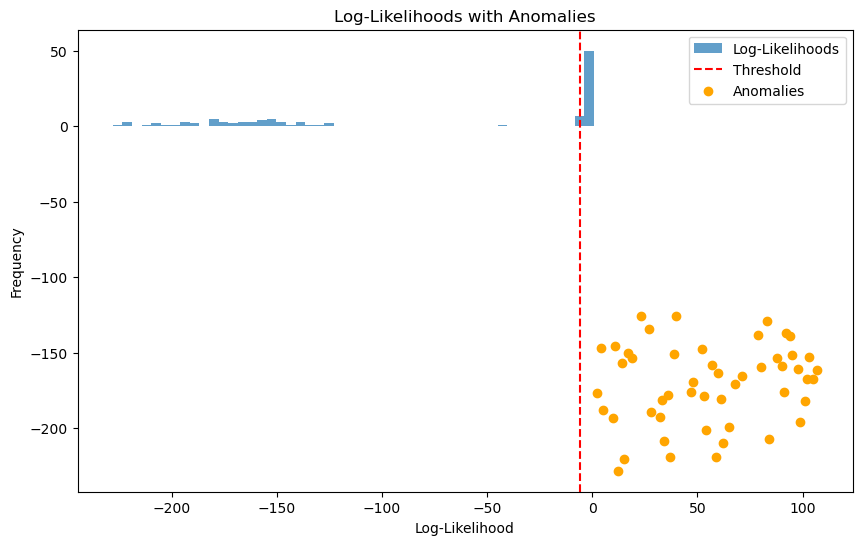

In [119]:
# Visualize the log-likelihoods
plt.figure(figsize=(10, 6))
plt.hist(log_likelihood_with_anomalies, bins=50, alpha=0.7, label='Log-Likelihoods')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(anomaly_indices, log_likelihood_with_anomalies[anomaly_indices], c='orange', label='Anomalies')
plt.title("Log-Likelihoods with Anomalies")
plt.xlabel("Log-Likelihood")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Manual Data Model Traning

In [120]:
# Train Gaussian Mixture Model (GMM)
n_components = 3  # Number of Gaussian components (clusters)
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(manual_train_data)

GaussianMixture(n_components=3, random_state=42)

In [121]:
# Compute likelihoods for test data
# Lower likelihood values indicate anomalies
log_likelihood = gmm.score_samples(manual_test_data)

In [122]:
# Set threshold for anomaly detection
# Use the 5th percentile of log-likelihoods as the threshold
threshold = np.percentile(log_likelihood, 5)
detected_anomalies = log_likelihood < threshold

In [123]:
num_anomalies = 50  # Number of anomalies to introduce
anomaly_indices = np.random.choice(len(manual_test_data), size=num_anomalies, replace=False)
manual_test_data_with_anomalies = manual_test_data.copy()
manual_test_data_with_anomalies[anomaly_indices] += np.random.uniform(5, 10, size=manual_test_data_with_anomalies.shape[1])

# Recalculate log-likelihood for data with anomalies
log_likelihood_with_anomalies = gmm.score_samples(manual_test_data_with_anomalies)
detected_anomalies_with_anomalies = log_likelihood_with_anomalies < threshold

# Create ground truth labels
ground_truth = np.zeros(len(manual_test_data_with_anomalies), dtype=int)
ground_truth[anomaly_indices] = 1  # Mark injected anomalies as 1

# Evaluate the model
precision = precision_score(ground_truth, detected_anomalies_with_anomalies)
recall = recall_score(ground_truth, detected_anomalies_with_anomalies)
f1 = f1_score(ground_truth, detected_anomalies_with_anomalies)
accuracy = accuracy_score(ground_truth, detected_anomalies_with_anomalies)

# Silhouette Score is only meaningful if we have multiple clusters
if len(set(detected_anomalies_with_anomalies)) > 1:
    silhouette = silhouette_score(manual_test_data_with_anomalies, gmm.predict(manual_test_data_with_anomalies))
    print(f"Silhouette Score: {silhouette:.2f}")
else:
    silhouette = "Not Applicable (Only one cluster)"
    print("Silhouette Score:", silhouette)
    
# Display metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Silhouette Score: 0.29
Precision: 0.06
Recall: 1.00
F1 Score: 0.11
Accuracy: 0.95


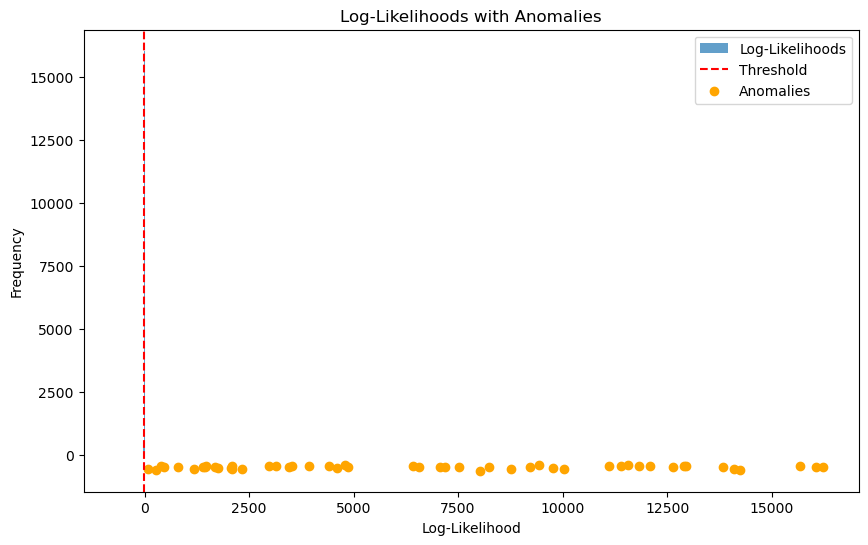

In [124]:
# Visualize the log-likelihoods
plt.figure(figsize=(10, 6))
plt.hist(log_likelihood_with_anomalies, bins=50, alpha=0.7, label='Log-Likelihoods')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(anomaly_indices, log_likelihood_with_anomalies[anomaly_indices], c='orange', label='Anomalies')
plt.title("Log-Likelihoods with Anomalies")
plt.xlabel("Log-Likelihood")
plt.ylabel("Frequency")
plt.legend()
plt.show()